In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [5]:
data=pd.read_csv('electricity_bill_dataset.csv')

In [6]:
data

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,0,2,New Delhi,Orient Green,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2


In [7]:
data.shape

(45345, 12)

In [8]:
data['MonthlyHours'].unique()

array([384, 488, 416, 475, 457, 471, 755, 492, 546, 578, 450, 493, 565,
       414, 594, 349, 355, 467, 646, 476, 659, 631, 395, 480, 678, 664,
       515, 509, 679, 564, 412, 468, 452, 447, 361, 442, 307, 494, 699,
       549, 385, 491, 636, 401, 360, 539, 577, 673, 443, 398, 653, 421,
       650, 484, 737, 405, 458, 466, 456, 394, 263, 490, 533, 495, 399,
       604, 512, 563, 496, 500, 502, 616, 589, 595, 487, 388, 437, 656,
       300, 523, 561, 628, 560, 425, 632, 389, 576, 340, 417, 503, 588,
       584, 771, 643, 552, 683, 436, 681, 668, 381, 544, 675, 665, 243,
       735, 587, 287, 756, 460, 345, 545, 407, 519, 662, 302, 582, 346,
       506, 373, 599, 422, 351, 569, 776, 696, 357, 325, 717, 419, 478,
       548, 508, 299, 537, 473, 449, 618, 540, 530, 418, 406, 521, 666,
       684, 528, 742, 768, 536, 472, 634, 438, 701, 462, 601, 408, 463,
       602, 635, 726, 744, 410, 591, 596, 415, 526, 377, 376, 724, 707,
       365, 308, 543, 455, 461, 633, 348, 623, 465, 371, 535, 51

In [9]:
data= data.sample(n=10000, random_state=2)

In [10]:

data.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
33171,14,22.0,3.0,22.0,1.0,0,12,Faridabad,Sterlite Power Transmission Ltd,620,8.1,5022.0
44957,21,23.0,1.0,8.0,1.0,0,9,Ahmedabad,Sunil Hitech Eng,447,7.9,3531.3
33477,7,19.0,3.0,19.0,1.0,0,10,Hyderabad,Neueon Towers / Sujana Towers Ltd.,658,8.4,5527.2
19923,6,19.0,3.0,19.0,1.0,0,6,Dahej,Reliance Energy,409,7.6,3108.4
34199,8,20.0,2.0,11.0,1.0,0,12,Pune,Tata Power Company Ltd.,343,9.1,3121.3


In [11]:
data.tail()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
38132,10,21.0,1.0,20.0,1.0,0,4,Chennai,Jaiprakash Power,596,8.8,5244.8
663,9,23.0,3.0,12.0,1.0,0,11,Chennai,Adani Power Ltd.,536,8.8,4716.8
19757,9,21.0,3.0,10.0,1.0,0,3,Faridabad,L&T Transmission & Distribution,356,8.1,2883.6
25415,12,22.0,2.0,7.0,1.0,0,8,Gurgaon,Ringfeder Power Transmission India Pvt. Ltd.,432,8.3,3585.6
37541,18,22.0,0.0,3.0,1.0,0,12,Mumbai,CESC,277,9.2,2548.4


In [12]:
data['ElectricityBill'].min()

1033.1999999999998

In [13]:
data.isnull().any()

Fan                False
Refrigerator       False
AirConditioner     False
Television         False
Monitor            False
MotorPump          False
Month              False
City               False
Company            False
MonthlyHours       False
TariffRate         False
ElectricityBill    False
dtype: bool

In [14]:


data.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 33171 to 37541
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              10000 non-null  int64  
 1   Refrigerator     10000 non-null  float64
 2   AirConditioner   10000 non-null  float64
 3   Television       10000 non-null  float64
 4   Monitor          10000 non-null  float64
 5   MotorPump        10000 non-null  int64  
 6   Month            10000 non-null  int64  
 7   City             10000 non-null  object 
 8   Company          10000 non-null  object 
 9   MonthlyHours     10000 non-null  int64  
 10  TariffRate       10000 non-null  float64
 11  ElectricityBill  10000 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 1015.6+ KB


In [16]:
data.duplicated()

33171    False
44957    False
33477    False
19923    False
34199    False
         ...  
38132    False
663      False
19757    False
25415    False
37541    False
Length: 10000, dtype: bool

array([[<Axes: title={'center': 'Fan'}>,
        <Axes: title={'center': 'Refrigerator'}>,
        <Axes: title={'center': 'AirConditioner'}>],
       [<Axes: title={'center': 'Television'}>,
        <Axes: title={'center': 'Monitor'}>,
        <Axes: title={'center': 'MotorPump'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'MonthlyHours'}>,
        <Axes: title={'center': 'TariffRate'}>],
       [<Axes: title={'center': 'ElectricityBill'}>, <Axes: >, <Axes: >]],
      dtype=object)

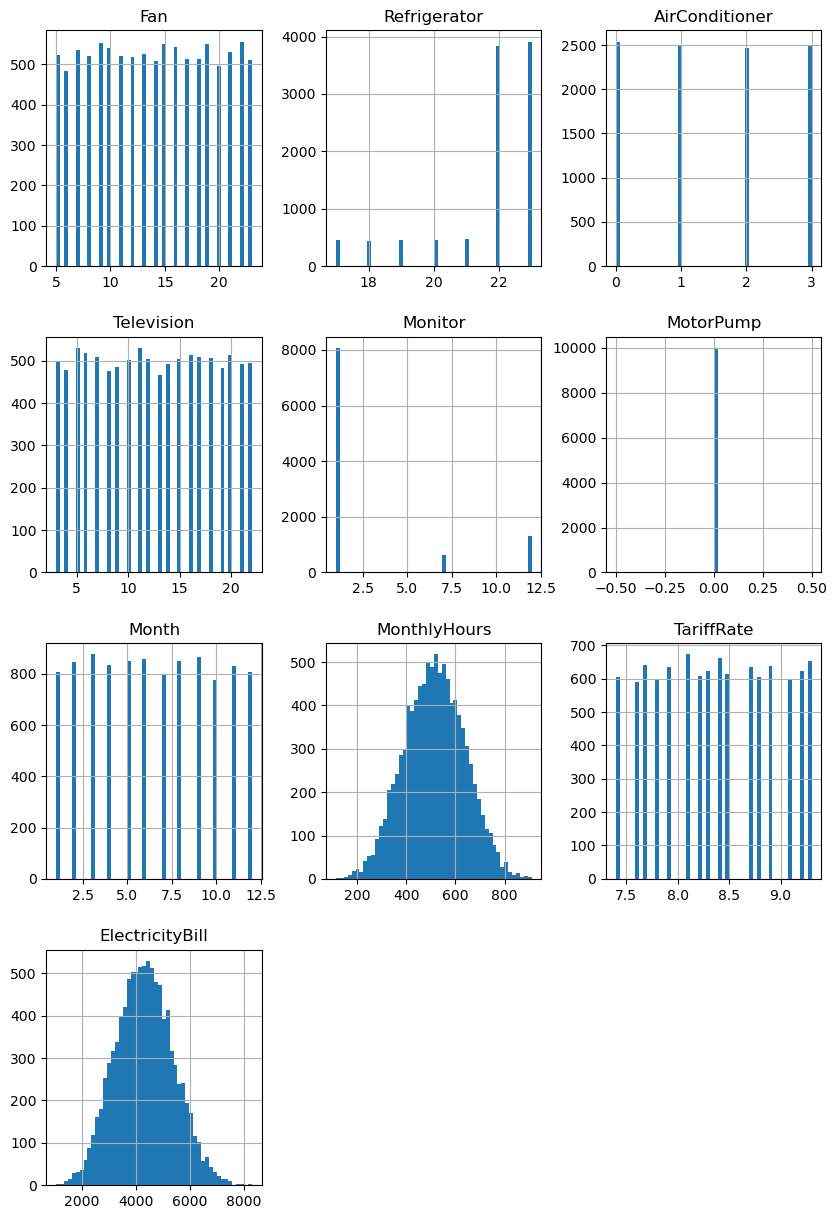

In [17]:
data.hist(bins=50,figsize=(10,15))

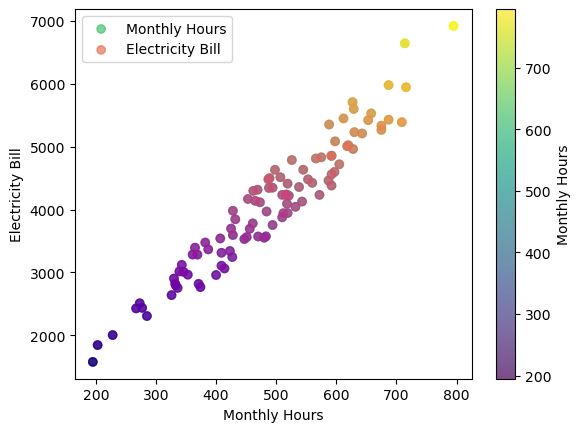

In [18]:
import matplotlib.pyplot as plt

# Sample data
data1 = data.head(100)
x = data1['MonthlyHours']
y = data1['ElectricityBill']

# Create a scatter plot for MonthlyHours
plt.xlabel('Monthly Hours')
plt.ylabel('Electricity Bill')

# Scatter plot for MonthlyHours (color-coded)
scatter1 = plt.scatter(x, y, c=x, cmap='viridis', label='Monthly Hours', alpha=0.7)

# Scatter plot for ElectricityBill (color-coded differently)
scatter2 = plt.scatter(x, y, c=y, cmap='plasma', label='Electricity Bill', alpha=0.7)

# Add a color bar to show the scale of colors for MonthlyHours
plt.colorbar(scatter1, label='Monthly Hours')

# Add the legend
plt.legend()

# Show the plot
plt.show()


In [19]:
enc=LabelEncoder()

In [20]:
data.City=enc.fit_transform(data.City)

In [21]:
data.Company=enc.fit_transform(data.Company)

In [22]:
data.corr()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
Fan,1.000000,0.560917,0.021804,0.011411,0.100388,NaN,-0.007332,0.002280,0.010183,0.430790,-0.008582,0.411939
Refrigerator,0.560917,1.000000,0.024398,0.012404,0.075333,NaN,0.001408,-0.012987,-0.001240,0.397529,-0.011691,0.379354
AirConditioner,0.021804,0.024398,1.000000,-0.019069,-0.001340,NaN,-0.000814,0.017688,-0.004139,0.285738,0.009094,0.277135
Television,0.011411,0.012404,-0.019069,1.000000,0.001886,NaN,-0.003630,0.000961,0.018621,0.430660,0.001494,0.413440
Monitor,0.100388,0.075333,-0.001340,0.001886,1.000000,NaN,-0.014288,-0.016449,-0.007768,0.317438,-0.011120,0.301747
MotorPump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.007332,0.001408,-0.000814,-0.003630,-0.014288,NaN,1.000000,-0.015481,-0.009444,0.018908,-0.004522,0.016827
City,0.002280,-0.012987,0.017688,0.000961,-0.016449,NaN,-0.015481,1.000000,-0.002891,0.003213,-0.088085,-0.022779
Company,0.010183,-0.001240,-0.004139,0.018621,-0.007768,NaN,-0.009444,-0.002891,1.000000,0.009853,-0.000341,0.008128
MonthlyHours,0.430790,0.397529,0.285738,0.430660,0.317438,NaN,0.018908,0.003213,0.009853,1.000000,-0.004826,0.959332


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 33171 to 37541
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              10000 non-null  int64  
 1   Refrigerator     10000 non-null  float64
 2   AirConditioner   10000 non-null  float64
 3   Television       10000 non-null  float64
 4   Monitor          10000 non-null  float64
 5   MotorPump        10000 non-null  int64  
 6   Month            10000 non-null  int64  
 7   City             10000 non-null  int32  
 8   Company          10000 non-null  int32  
 9   MonthlyHours     10000 non-null  int64  
 10  TariffRate       10000 non-null  float64
 11  ElectricityBill  10000 non-null  float64
dtypes: float64(6), int32(2), int64(4)
memory usage: 937.5 KB


In [24]:
data.drop(columns=['MotorPump'], inplace=True)

In [25]:
data

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
33171,14,22.0,3.0,22.0,1.0,12,3,25,620,8.1,5022.0
44957,21,23.0,1.0,8.0,1.0,9,0,26,447,7.9,3531.3
33477,7,19.0,3.0,19.0,1.0,10,5,16,658,8.4,5527.2
19923,6,19.0,3.0,19.0,1.0,6,2,21,409,7.6,3108.4
34199,8,20.0,2.0,11.0,1.0,12,12,27,343,9.1,3121.3
...,...,...,...,...,...,...,...,...,...,...,...
38132,10,21.0,1.0,20.0,1.0,4,1,7,596,8.8,5244.8
663,9,23.0,3.0,12.0,1.0,11,1,0,536,8.8,4716.8
19757,9,21.0,3.0,10.0,1.0,3,3,11,356,8.1,2883.6
25415,12,22.0,2.0,7.0,1.0,8,4,23,432,8.3,3585.6


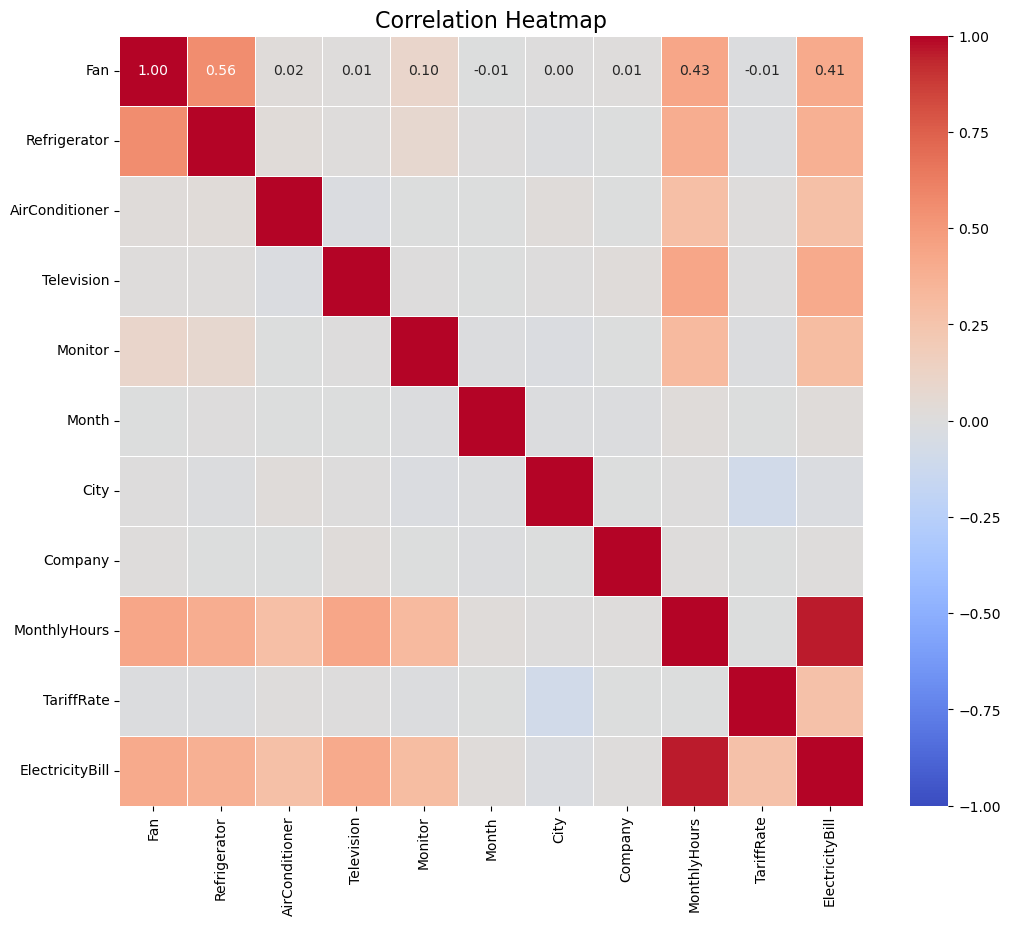

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df
# df = pd.read_csv('your_data.csv')  # Uncomment if you're loading from a CSV

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Title for the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


In [27]:
X=data.loc[:,('Fan','Refrigerator','AirConditioner','Television','MonthlyHours')]

In [28]:
X

,Fan,Refrigerator,AirConditioner,Television,MonthlyHours
33171,14,22.0,3.0,22.0,620
44957,21,23.0,1.0,8.0,447
33477,7,19.0,3.0,19.0,658
19923,6,19.0,3.0,19.0,409
34199,8,20.0,2.0,11.0,343
...,...,...,...,...,...
38132,10,21.0,1.0,20.0,596
663,9,23.0,3.0,12.0,536
19757,9,21.0,3.0,10.0,356
25415,12,22.0,2.0,7.0,432


In [29]:
max(data['Month'])

12

In [30]:
min(data['Month'])

1

In [31]:
Y=data.iloc[:,-1]

In [32]:
Y

33171    5022.0
44957    3531.3
33477    5527.2
19923    3108.4
34199    3121.3
          ...  
38132    5244.8
663      4716.8
19757    2883.6
25415    3585.6
37541    2548.4
Name: ElectricityBill, Length: 10000, dtype: float64

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=5)

In [34]:
print(X.shape,X_test.shape,X_train.shape)

(10000, 5) (4000, 5) (6000, 5)


In [35]:
scaler=StandardScaler()

In [36]:
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train_standardized=scaler.transform(X_train)

In [38]:
print(X_train_standardized)

[[ 0.36767921  0.17617438  1.34179063 -1.4777477   0.2497862 ]
 [-0.54369618  0.17617438  1.34179063  0.96260158  0.50023083]
 [ 1.27905461  0.17617438  0.44676631  0.78829092  1.38890531]
 ...
 [ 1.64360477  0.77303846  1.34179063  1.31122291  0.54062512]
 [-0.17914602  0.77303846 -0.44825801  1.13691225 -0.36420708]
 [-0.72597126  0.77303846  1.34179063 -0.95481571 -0.03297386]]


In [39]:
print(X_train_standardized.std())

1.0


In [40]:
model=LinearRegression()

In [41]:
model.fit(X_train,Y_train)

LinearRegression()

In [42]:
y_predict=model.predict(X_test)

In [43]:
acc=r2_score(Y_test,y_predict)*100

In [44]:
acc
#linear Regression

91.81223492383577

In [45]:
from sklearn.linear_model import Lasso

In [46]:
model1=Lasso()

In [47]:

model1.fit(X_train,Y_train)

Lasso()

In [48]:
y_pred1=model1.predict(X_test)

In [49]:
acc1=r2_score(Y_test,y_pred1)*100

In [50]:
acc1
#lasso Regression

91.81310107130636

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
model2=DecisionTreeRegressor()

In [53]:
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [54]:
y_pred2=model2.predict(X_test)

In [55]:
acc2=r2_score(Y_test,y_pred2)*100

In [56]:
acc2
#Decison Tree Regressor

83.20947252689813

In [57]:
model3=RandomForestRegressor()

In [58]:
model3.fit(X_train,Y_train)

RandomForestRegressor()

In [59]:
y_pred3=model3.predict(X_test)

In [60]:
acc3=r2_score(Y_test,y_pred3)*100

In [61]:
acc3
#RandomForest Regressor

90.47737468828043

In [62]:
model4=SVR()

In [63]:
model4.fit(X_train,Y_train)

SVR()

In [64]:
y_pred4=model4.predict(X_test)

In [65]:
acc4=r2_score(Y_test,y_pred4)*100

In [66]:
acc4
#SVR

60.62690850127284

In [67]:
from sklearn.model_selection import KFold

In [68]:

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle for randomness


In [69]:
mse_scores = []
r2_scores = []


    
model3.fit(X_train, Y_train)  # Train the model
predictions = model3.predict(X_test)  # Make predictions
mse = mean_squared_error(Y_test, predictions)  # Calculate Mean Squared Error
r2 = r2_score(Y_test, predictions)              # Calculate R^2 Score
mse_scores.append(mse)  # Store the MSE score
r2_scores.append(r2)    # Store the R^2 score

# Calculate and print the average scores
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)

print(f'Average MSE across {k} folds: {average_mse:.2f}')
print(f'Average R^2 across {k} folds: {average_r2:.2f}')


Average MSE across 5 folds: 108449.12
Average R^2 across 5 folds: 0.90


In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
models=[LinearRegression,SVR,KNeighborsRegressor(),RandomForestRegressor(),DecisionTreeRegressor()]

In [72]:
def compare_models_cross_validation():
    for model in models:
        cv_score=cross_val_score(models,X,Y,cv=5)
        mse=sum(cv_score)/len(cv_score)
        mse=mse*100
        mse=round(mse,2)
    print(cv_score)
print(mse)

        

108449.11577143287


In [73]:
import pickle
from tkinter import*
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from PIL import ImageTk,Image

In [74]:
filename="miniproject"
pickle.dump(model,open(filename,'wb'))
model22=pickle.load(open(filename,'rb'))
with open('model22.pkl','wb') as files:
    pickle.dump(model22,files)

In [ ]:
import tkinter as tk
from tkinter import ttk

with open('model22.pkl', 'rb') as model_file:
    Result = pickle.load(model_file)
def validate_input(entry, min_val, max_val, data_type):
    try:
        value = data_type(entry.get())
        if not (min_val <= value <= max_val):
            raise ValueError(f'The input field should be between {min_val} and {max_val}')
        #entry.configure(bg='light green')  # Reset background color if validation succeeds
        return value
    except ValueError as ve:
        #entry.configure(bg='red')  # Set background color to red on validation error
        messagebox.showerror('Error', str(ve))
        return None

def predict():
    

        # Validate input values
        fan = validate_input(entry1,1,24,int)
        Refrigerator = validate_input(entry3,1,24,int)
        AC = validate_input(entry4,1,24,int)
        TV = validate_input(entry5,1,24,int)
        MonthlyHours = validate_input(entry6 , 1, 700, int)
# Assuming entry6 is a text entry

        if any(value is None for value in [MonthlyHours]):
            return  # Exit if any input is invalid

        inp = np.array([fan,Refrigerator, AC, TV, MonthlyHours])
        prediction = int(Result.predict(inp.reshape(1, -1)))

        # Display the result
        if prediction <= 0:  
            text = 'Check your inputs'
        else:
            text = f'Total Electricity Bill: Rs.{prediction}'

        t.delete('1.0', 'end')
        t.insert('1.0', text)

   
def reset():
    # Clear all input fields and output text, reset background colors
    for entry in [entry1, entry3, entry4, entry5]:
        entry.set(0)  # Set Scale widgets to their default value (e.g., 0)
    
    entry6.delete('0', 'end')  # Assuming entry6 is a text entry
    entry6.configure(bg='white')

    t.delete('1.0', 'end')
    
    # Reset the Scale value (if applicable)
    
# Create the main window
root = tk.Tk()
root.title('Electricity Bill Prediction')
root.geometry("1920x1080")


image_0=Image.open("photos 34 (3).jpg")
background=ImageTk.PhotoImage(image_0)

label=tk.Label(root,image=background)
label.place(x=0,y=0)

label1=tk.Label(root,text="Electricity Bill Prediction",font=("Times new roman",50,"bold"),fg="yellow",bg="black")
label1.pack()

# Feature 1
label2 = tk.Label(text="Fan", fg="black", font=("Times new roman", 20,"bold"),bg="orange",width=23)
label2.pack(pady=5)
label2.place(x=100, y=200)
entry1 = tk.Scale(root,from_=1, to=24, orient=tk.HORIZONTAL, length=300,width=15, font=("Times new roman", 20,"bold"),fg="black")
entry1.pack(pady=20)
entry1.place(x=130, y=240)

# Feature 2


# Feature 3
label4 = tk.Label(text="Refrigerator", fg="black", font=("Times new roman", 20,"bold"),bg="orange",width=23)
label4.place(x=500, y=200)
entry3 = tk.Scale(root,from_=1, to=24, orient=tk.HORIZONTAL,length=320, width=15, font=("Times new roman", 20,"bold"),fg="black")
entry3.place(x=510, y=240)

# Feature 4
label5 = tk.Label(text="AC", fg="black", font=("Times new roman",20,"bold"),bg="orange",width=23)
label5.place(x=890, y=200)
entry4 = tk.Scale(root,from_=1, to=24, orient=tk.HORIZONTAL,length=320, width=10, font=("Times new roman", 20,"bold"),fg="black")
entry4.place(x=900, y=240)


# Feature 5
label6 = tk.Label(text="TV", fg="black", font=("Times new roman", 20,"bold"),bg="orange",width=23)
label6.place(x=320, y=350)
entry5 = tk.Scale(root, from_=1, to=24, orient=tk.HORIZONTAL,length=320,width=10, font=("Times new roman", 20,"bold"),fg="black")
entry5.place(x=350, y=390)

# Feature 6
label7 = tk.Label(text="MonthlyHours[range(1-700)]", fg="black", font=("Times new roman", 20,"bold"),bg="orange",width=23)
label7.place(x=770, y=350)
entry6 = tk.Entry(root, width=10, font=("Times new roman", 20,"bold"),fg="black")
entry6.place(x=870, y=390)


# Buttons
button1 = tk.Button(root, text='PREDICT', highlightbackground='grey',fg="violet", command=predict, font=("Times new roman", 20,"bold"),bg="black")
button1.place(x=650,y=475)

t = tk.Text(root, highlightbackground='green', fg="dark blue", bg="pink", height=2, width=30, font=("Times new roman", 20,"bold"))
t.place(x=520,y=535)

button2 = tk.Button(root, text='Clear', fg="blue", command=reset, font=("Times new roman", 20,"bold"))
button2.place(x=650,y=620)

# Start the main event loop
root.mainloop()


C:\Users\Likhitha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Likhitha\AppData\Local\Temp\ipykernel_16168\829830191.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(Result.predict(inp.reshape(1, -1)))
C:\Users\Likhitha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Likhitha\AppData\Local\Temp\ipykernel_16168\829830191.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 